The value of Em is: 0.9248259876086186
The value of E1 is: 0.7149904840733312
The value of E2 is: 1.2206631351898622


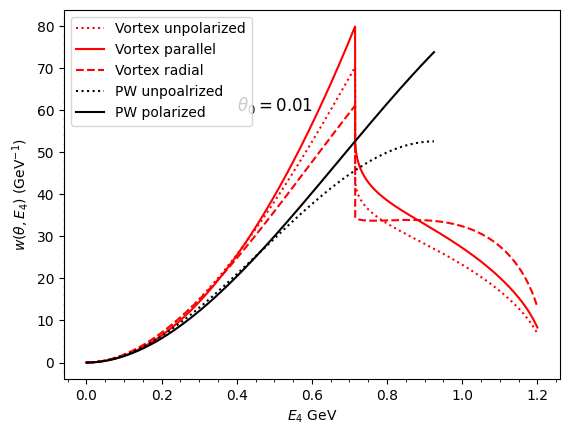

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np


# Define the given parameters
E = 3.1
y = 29.3                  #gamma
m = E/y
theta = math.pi/60
b = math.sqrt(y**2 - 1)/y #beta
theta_0 = 0.01
beta=b

#Energies
Em= m**2/(2*E*(1-b*math.cos(theta)))
print("The value of Em is:", Em)
E1= m**2/(2*E*(1-b*math.cos(theta+theta_0)))
E2=m**2/(2*E*(1-b*math.cos(theta-theta_0)))

# Define constants a and b1
a = 1-b*math.cos(theta)*math.cos(theta_0)
b1 = b*math.sin(theta)*math.sin(theta_0)

def t(E_e):
    num = (E_e-E1)*E2-(E2-E_e)*E1
    den = E_e*(E2-E1)
    return math.acos(num/den)


#Define A's and B's
A_LE = a
B_LE = a**2 + (b1**2)/2

def A_HE(E_e):
  return   (a*t(E_e)/math.pi - b1*math.sin(t(E_e))/math.pi)

def B_HE(E_e):
  return  a**2*t(E_e)/math.pi + b1**2*t(E_e)/(2*math.pi) - 2*a*b1*math.sin(t(E_e))/math.pi + b1**2*math.sin(2*t(E_e))/(4*math.pi)

#Check if values are working
print("The value of E1 is:", E1)
print("The value of E2 is:", E2)

# Define functions for vortex unpolarized
def vup(E_e):
    if E_e >= E1 and E_e <= E2:
        return ((4*y*(E_e**2)/(math.pi*m**5))*(3*m**2*(A_HE(E_e)) - 4*E*E_e*(B_HE(E_e))))
    elif E_e < E1:
        return ((4*y*(E_e**2)/(math.pi*m**5))*(3*m**2*(A_LE)-2*E*E_e*(B_LE)))
    else:
        return None

# Define functions for planewave unpolarized
def PWun(E_e):
  if E_e< Em:
       return ((4*y*(E_e**2)/(math.pi*m**5))*(3*m**2*(1-b*math.cos(theta))-4*E*E_e*(1-b*math.cos(theta))**2))
  else:
       return None

# Define functions for vortex parallel polarized
def VP(E_e):
    if E_e >= E1 and E_e <= E2:
        return (vup(E_e)-(4*y*(E_e**2)/(math.pi*m**5))*(m/E)*((y*(m**2*(a*t(E_e)/math.pi - b1*math.sin(t(E_e))/math.pi) - 4*E*E_e*(a**2*t(E_e)/math.pi + b1**2*t(E_e)/(2*math.pi) - 2*a*b1*math.sin(t(E_e))/math.pi + b1**2*math.sin(2*t(E_e))/(4*math.pi)))/beta) - ((m**2*t(E_e)/np.pi - 4*E*E_e*(a*t(E_e)/math.pi - b1*math.sin(t(E_e))/math.pi))/(beta*y))) )
    elif E_e < E1:
        return (vup(E_e)-(4*y*(E_e**2)/(math.pi*m**5))*(m/E)*((y*(m**2*a - 2*E*E_e*(2*a**2+b1**2))/beta) - ((m**2 - 4*E*E_e*a)/(beta*y))))
    else:
        return None

# Define functions for vortex radial polarized
def RP(E_e):
    if E_e >= E1 and E_e <= E2:
        return  (vup(E_e)-(4*y*(E_e**2)/(math.pi*m**5))*(m/E)*((np.cos(theta_0)-beta*np.cos(theta))*(m**2*t(E_e)/math.pi-4*E*E_e*A_HE(E_e))/(beta*np.sin(theta_0))-np.cos(theta_0)*(m**2*A_HE(E_e)-4*E_e*E*B_HE(E_e))/(beta*np.sin(theta_0))))
    elif E_e < E1:
        return (vup(E_e)-(4*y*(E_e**2)/(math.pi*m**5))*(m/E)*((np.cos(theta_0)-beta*np.cos(theta))*(m**2-4*E*E_e*a)/(beta*np.sin(theta_0))-np.cos(theta_0)*(m**2*a-4*E_e*E*(a**2 + (b1**2)/2))/(beta*np.sin(theta_0))))
    else:
        return None

# Define functions for planewave forward-polarized
def PWP(E_e):
  if E_e< Em:
       return (4*y*(E_e**2)/(math.pi*m**5)*(3*m**2*(1-b*math.cos(theta))-4*E*E_e*(1-b*math.cos(theta))**2-(beta-np.cos(theta))*(m**2-4*E*E_e*(1-b*math.cos(theta)))))
  else:
       return None


# Define a range of values for E_e
E_e_values = [i/10000 for i in range(1, 12000)]

# Calculate the corresponding values of w and vortex for each E_e value
vup_values = [vup(E_e) for E_e in E_e_values]
vp_values = [VP(E_e) for E_e in E_e_values]
pwun_values = [PWun(E_e) for E_e in E_e_values]
pwp_values = [PWP(E_e) for E_e in E_e_values]
rp_values = [RP(E_e) for E_e in E_e_values]
# Create a plot of w vs E_e and vortex vs E_e
fig, ax = plt.subplots()
ax.plot(E_e_values, vup_values, color='red',linestyle='dotted', label='Vortex unpolarized')
ax.plot(E_e_values, vp_values, color='red',linestyle='solid', label='Vortex parallel')
ax.plot(E_e_values, rp_values, color='red',linestyle='dashed', label='Vortex radial')
ax.plot(E_e_values, pwun_values, color='black',linestyle='dotted', label='PW unpoalrized')
ax.plot(E_e_values, pwp_values, color='black',linestyle='solid', label='PW polarized')
ax.set_xlabel('$E_4$ GeV')
ax.set_ylabel('$w(θ,E_4)$ (GeV$^{-1})$')

plt.text(0.4, 60, r'$\theta_0 =$' + str(theta_0), fontsize=12)
# Add minor ticks to the x-axis
ax.minorticks_on()
ax.tick_params(which='minor', axis='y', color='k', width=0.5, length=0.5)
plt.legend()
plt.show()






The value of Em is: 0.9248259876086186
The value of E1 is: 0.7149904840733312
The value of E2 is: 1.2206631351898622
The value of Ale is: 0.0020021564713208484
The value of A_HE is: 0.0020021564713208484
The value of Ble is: 4.145419064408324e-06
The value of B_HE is: 4.145419064408324e-06


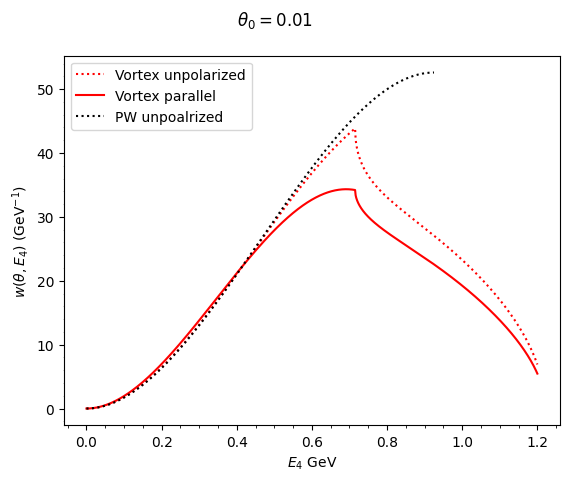

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np


# Define the given parameters
E = 3.1
y = 29.3                  #gamma
m = E/y
theta = math.pi/60
b = math.sqrt(y**2 - 1)/y #beta
theta_0 = 0.01
beta=b

#Energies
Em= m**2/(2*E*(1-b*math.cos(theta)))
print("The value of Em is:", Em)
E1= m**2/(2*E*(1-b*math.cos(theta+theta_0)))
E2=m**2/(2*E*(1-b*math.cos(theta-theta_0)))

# Define constants a and b1
a = 1-b*math.cos(theta)*math.cos(theta_0)
b1 = b*math.sin(theta)*math.sin(theta_0)

def t(E_e):
  if E_e >= E1 and E_e <= E2:
    num = (E_e-E1)*E2-(E2-E_e)*E1
    den = E_e*(E2-E1)
    return math.acos(num/den)
  elif E_e < E1:
        return 1


#Define A's and B's
A_LE = a
B_LE = a**2 + (b1**2)/2

def A_HE(E_e):
  return   (a*t(E_e)/math.pi - b1*math.sin(t(E_e))/math.pi)

def B_HE(E_e):
  return  a**2*t(E_e)/math.pi + b1**2*t(E_e)/(2*math.pi) - 2*a*b1*math.sin(t(E_e))/math.pi + b1**2*math.sin(2*t(E_e))/(4*math.pi)

#Check if values are working
print("The value of E1 is:", E1)
print("The value of E2 is:", E2)

#secondary check
print("The value of Ale is:", A_LE)
print("The value of A_HE is:", A_HE(E1))
print("The value of Ble is:", B_LE)
print("The value of B_HE is:", B_HE(E1))


# Define functions for vortex unpolarized
def vup(E_e):
    if E_e >= E1 and E_e <= E2:
        return ((4*y*(E_e**2)/(math.pi*m**5))*(3*m**2*(A_HE(E_e)) - 4*E*E_e*(B_HE(E_e))))
    elif E_e < E1:
        return ((4*y*(E_e**2)/(math.pi*m**5))*(3*m**2*(A_LE)-4*E*E_e*(B_LE)))
    else:
        return None

# Define functions for planewave unpolarized
def PWun(E_e):
  if E_e< Em:
       return ((4*y*(E_e**2)/(math.pi*m**5))*(3*m**2*(1-b*math.cos(theta))-4*E*E_e*(1-b*math.cos(theta))**2))
  else:
       return None

# Define functions for vortex parallel polarized
def VP(E_e):
    if E_e >= E1 and E_e <= E2:
        return (vup(E_e)+(4*y*(E_e**2)/(math.pi*m**5))*(m/E)*((y*(m**2*(A_HE(E_e)) - 4*E*E_e*(a**2*t(E_e)/math.pi + b1**2*t(E_e)/(2*math.pi) - 2*a*b1*math.sin(t(E_e))/math.pi + b1**2*math.sin(2*t(E_e))/(4*math.pi)))/beta) - ((m**2*t(E_e)/np.pi - 4*E*E_e*(a*t(E_e)/math.pi - b1*math.sin(t(E_e))/math.pi))/(beta*y))) )
    elif E_e < E1:
        return (vup(E_e)+(4*y*(E_e**2)/(math.pi*m**5))*(m/E)*((y*(m**2*a - 2*E*E_e*(2*a**2+b1**2))/beta) - ((m**2 - 4*E*E_e*a)/(beta*y))))
    else:
        return None

# Define a range of values for E_e
E_e_values = [i/10000 for i in range(1, 12000)]

# Calculate the corresponding values of w and vortex for each E_e value
vup_values = [vup(E_e) for E_e in E_e_values]
vp_values = [VP(E_e) for E_e in E_e_values]
pwun_values = [PWun(E_e) for E_e in E_e_values]
#pwp_values = [PWP(E_e) for E_e in E_e_values]
#rp_values = [RP(E_e) for E_e in E_e_values]
# Create a plot of w vs E_e and vortex vs E_e
fig, ax = plt.subplots()
ax.plot(E_e_values, vup_values, color='red',linestyle='dotted', label='Vortex unpolarized')
ax.plot(E_e_values, vp_values, color='red',linestyle='solid', label='Vortex parallel')
#ax.plot(E_e_values, rp_values, color='red',linestyle='dashed', label='Vortex radial')
ax.plot(E_e_values, pwun_values, color='black',linestyle='dotted', label='PW unpoalrized')
#ax.plot(E_e_values, pwp_values, color='black',linestyle='solid', label='PW polarized')
ax.set_xlabel('$E_4$ GeV')
ax.set_ylabel('$w(θ,E_4)$ (GeV$^{-1})$')

plt.text(0.4, 60, r'$\theta_0 =$' + str(theta_0), fontsize=12)
# Add minor ticks to the x-axis
ax.minorticks_on()
ax.tick_params(which='minor', axis='y', color='k', width=0.5, length=0.5)
plt.legend()
plt.show()

